# Potato Disease Classification

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=60

In [3]:
tf_dataset=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",
                                                   shuffle=True,
                                                   image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                   batch_size=BATCH_SIZE
                                                   )

Found 2152 files belonging to 3 classes.


In [4]:
len(tf_dataset)

68

Meaning there are 68 batches of 32 images in each batch.

In [5]:
class_names=tf_dataset.class_names

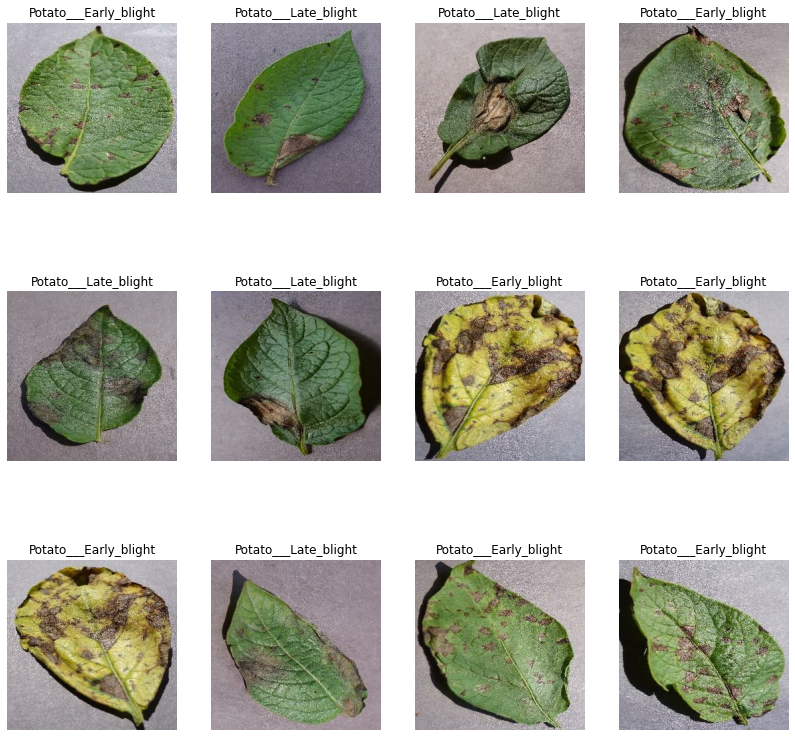

In [6]:
plt.figure(figsize=(14,14))
for image_batch, label_batch in tf_dataset.take(1):
     for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [7]:
def split_dataset(dataset,train_size=0.8,valid_size=0.1,test_size=0.1,shuffle=True,shuffle_size=10000):
    total_size=len(dataset)
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=12)
    train_len=int(total_size*train_size)
    valid_len=int(total_size*valid_size)
    test_len=int(total_size*test_size)
    
    train=dataset.take(train_len)
    valid=dataset.skip(train_len).take(valid_len)
    test=dataset.skip(train_len).skip(valid_len)
    
    return train,test,valid

In [8]:
train,test,valid=split_dataset(tf_dataset)

In [9]:
print(len(train),len(test),len(valid))

54 8 6


In [10]:
train=train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid=valid.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

In [12]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [13]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'),
])
model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [15]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [16]:
history=model.fit(
    train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=valid
)

Epoch 1/60
54/54 [==============================] - 112s 2s/step - loss: 0.8976 - accuracy: 0.5747 - val_loss: 0.5747 - val_accuracy: 0.8021
Epoch 2/60
54/54 [==============================] - 105s 2s/step - loss: 0.3608 - accuracy: 0.8669 - val_loss: 0.3529 - val_accuracy: 0.8229
Epoch 3/60
54/54 [==============================] - 104s 2s/step - loss: 0.2944 - accuracy: 0.8762 - val_loss: 0.1556 - val_accuracy: 0.9688
Epoch 4/60
54/54 [==============================] - 111s 2s/step - loss: 0.2196 - accuracy: 0.9132 - val_loss: 0.1540 - val_accuracy: 0.9271
Epoch 5/60
54/54 [==============================] - 109s 2s/step - loss: 0.2359 - accuracy: 0.9109 - val_loss: 0.1791 - val_accuracy: 0.9479
Epoch 6/60
54/54 [==============================] - 109s 2s/step - loss: 0.2054 - accuracy: 0.9236 - val_loss: 0.1083 - val_accuracy: 0.9583
Epoch 7/60
54/54 [==============================] - 103s 2s/step - loss: 0.1291 - accuracy: 0.9572 - val_loss: 0.0748 - val_accuracy: 0.9740
Epoch 8/60
54

Epoch 42/60
54/54 [==============================] - 107s 2s/step - loss: 0.0378 - accuracy: 0.9855 - val_loss: 0.0289 - val_accuracy: 0.9896
Epoch 43/60
54/54 [==============================] - 105s 2s/step - loss: 0.0441 - accuracy: 0.9821 - val_loss: 0.0653 - val_accuracy: 0.9688
Epoch 44/60
54/54 [==============================] - 103s 2s/step - loss: 0.0431 - accuracy: 0.9844 - val_loss: 0.0773 - val_accuracy: 0.9740
Epoch 45/60
54/54 [==============================] - 103s 2s/step - loss: 0.0406 - accuracy: 0.9832 - val_loss: 0.1116 - val_accuracy: 0.9635
Epoch 46/60
54/54 [==============================] - 104s 2s/step - loss: 0.0328 - accuracy: 0.9873 - val_loss: 0.1136 - val_accuracy: 0.9635
Epoch 47/60
54/54 [==============================] - 102s 2s/step - loss: 0.0640 - accuracy: 0.9774 - val_loss: 0.0345 - val_accuracy: 0.9844
Epoch 48/60
54/54 [==============================] - 105s 2s/step - loss: 0.0355 - accuracy: 0.9878 - val_loss: 0.0401 - val_accuracy: 0.9792
Epoch 

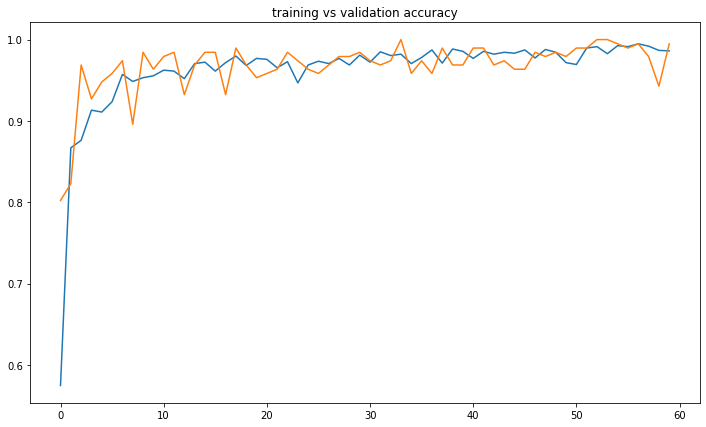

In [28]:
plt.figure(figsize=(12,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('training vs validation accuracy')
plt.show()

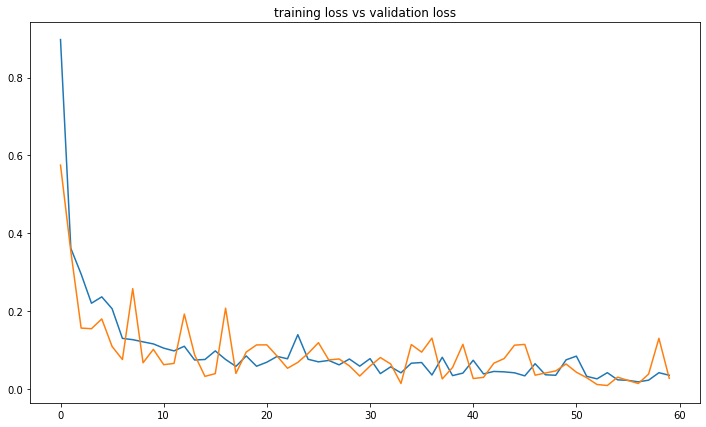

In [29]:
plt.figure(figsize=(12,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("training loss vs validation loss")
plt.show()

In [26]:
score=model.evaluate(test)

8/8 [==============================] - 3s 342ms/step - loss: 0.0526 - accuracy: 0.9805


In [27]:
score

[0.05261868238449097, 0.98046875]

First image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 496ms/step
predicted label: Potato___Late_blight


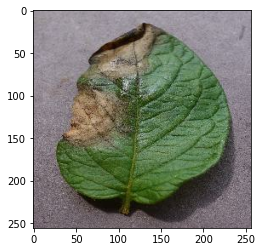

In [41]:
import numpy as np
for image_batch, label_batch in test.take(1):
    image1=image_batch[0].numpy().astype('uint8')
    label1=label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(image1)
    print("actual label:",class_names[label1])
    
    batch_pred=model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_pred[0])])

In [48]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 48ms/step


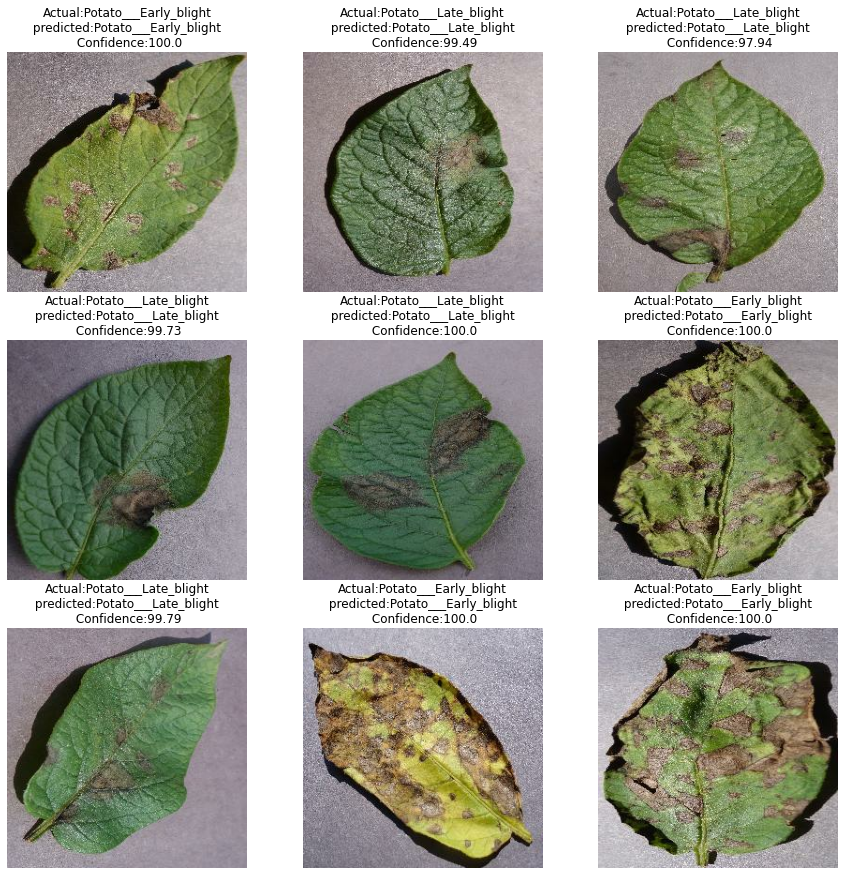

In [49]:
plt.figure(figsize=(15,15))
for image,label in test.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')
        p_class,conf=predict(model,image[i].numpy())
        act=class_names[label[i]]
        
        plt.title(f'Actual:{act}\n predicted:{p_class} \n Confidence:{conf}')


In [54]:
model.save("../")

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets
